## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)

In [56]:
##Example: Loading MNIST dataset

from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 21s 5us/step


### Find no.of samples are there in training and test datasets

In [57]:
print("x train is: {}".format(x_train.shape)) 
print("y train is: {}".format(y_train.shape))

x train is: (60000, 28, 28)
y train is: (60000,)


In [58]:
print("x test is: {}".format(x_test.shape)) 
print("y test is: {}".format(y_test.shape))

x test is: (10000, 28, 28)
y test is: (10000,)


### Find dimensions of an image in the dataset

In [59]:
x_test[0].shape

(28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
## 10 is the number of classes in our target variable
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
x_train /= 255
x_test /= 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
## done above

### Import the necessary layers from keras to build the model

In [0]:
## done above

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=30`. **

In [0]:
TRAIN = True
BATCH_SIZE = 32
EPOCHS = 30

In [65]:
if TRAIN:
    # Define model
    model2 = Sequential()

    # 1st Conv Layer
    model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model2.add(Activation('relu'))

    # 2nd Conv Layer
    model2.add(Convolution2D(32, 3, 3))
    model2.add(Activation('relu'))

    # Fully Connected Layer
    model2.add(Flatten())
    model2.add(Dense(128))
    model2.add(Activation('relu'))

    # Prediction Layer
    model2.add(Dense(10))
    model2.add(Activation('softmax'))

    # Loss and Optimizer
    model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model2
    model2.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test), callbacks=callback_list)
    
    # Save model2 and Stats
    model2.save('gdrive/My Drive/AIML/Labs/CV/model/basic_cnn.h5')

else:
    print('Loading pretrained model...')
    model2 = keras.models.load_model('gdrive/My Drive/AIML/Labs/CV/model/basic_cnn.h5')
    print('Model Loaded.')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 23s 392us/step - loss: 0.3798 - acc: 0.8628 - val_loss: 0.2962 - val_acc: 0.8882
Epoch 2/30
60000/60000 [==============================] - 23s 380us/step - loss: 0.2303 - acc: 0.9153 - val_loss: 0.2493 - val_acc: 0.9090
Epoch 3/30
60000/60000 [==============================] - 23s 378us/step - loss: 0.1660 - acc: 0.9371 - val_loss: 0.2490 - val_acc: 0.9137
Epoch 4/30
60000/60000 [==============================] - 23s 378us/step - loss: 0.1152 - acc: 0.9575 - val_loss: 0.2667 - val_acc: 0.9155
Epoch 5/30
60000/60000 [==============================] - 23s 379us/step - loss: 0.0770 - acc: 0.9712 - val_loss: 0.3089 - val_acc: 0.9115
Epoch 6/30
60000/60000 [==============================] - 23s 376us/step - loss: 0.0510 - acc: 0.9816 - val_loss: 0.3442 - val_acc: 0.9170
Epoch 7/30
60000/60000 [==============================] - 22s 372us/step - loss: 0.0352 - acc: 0.9877 - val_loss: 0.

In [66]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_29 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_30 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               2359424   
_________________________________________________________________
activation_31 (Activation)   (None, 128)               0         
__________

In [67]:
loss_and_metrics2 = model2.evaluate(x_test, y_test)
print(loss_and_metrics2)

10000/10000 [==============================] - 1s 104us/step
[0.5625763349669054, 0.9059]


In [68]:
loss_and_metrics_train_2 = model2.evaluate(x_train, y_train)
print(loss_and_metrics_train_2)

60000/60000 [==============================] - 6s 107us/step
[0.022531461145596406, 0.9923333333333333]


### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
TRAIN = True
BATCH_SIZE = 32
EPOCHS = 30

In [70]:
if TRAIN:
    # Deine Model
    model3 = Sequential()

    # 1st Conv Layer
    model3.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model3.add(Activation('relu'))

    # 2nd Conv Layer
    model3.add(Convolution2D(32, 3, 3))
    model3.add(Activation('relu'))

    # Max Pooling
    model3.add(MaxPooling2D(pool_size=(2,2)))
    
    # Dropout
    model3.add(Dropout(0.25))

    # Fully Connected Layer
    model3.add(Flatten())
    model3.add(Dense(128))
    model3.add(Activation('relu'))
    
    # More Dropout
    model3.add(Dropout(0.25))

    # Prediction Layer
    model3.add(Dense(10))
    model3.add(Activation('softmax'))

    # Loss and Optimizer
    model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model
    model3.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test), callbacks=callback_list)
    
    # Save model and Stats
    model3.save('gdrive/My Drive/AIML/Labs/CV/model/cnn.h5')

else:
    print('Loading pretrained model...')
    model3 = keras.models.load_model('gdrive/My Drive/AIML/Labs/CV/model/cnn.h5')
    print('Model Loaded.')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 22s 360us/step - loss: 0.4320 - acc: 0.8452 - val_loss: 0.3026 - val_acc: 0.8931
Epoch 2/30
60000/60000 [==============================] - 21s 346us/step - loss: 0.2924 - acc: 0.8931 - val_loss: 0.2755 - val_acc: 0.8958
Epoch 3/30
60000/60000 [==============================] - 21s 348us/step - loss: 0.2469 - acc: 0.9083 - val_loss: 0.2450 - val_acc: 0.9078
Epoch 4/30
60000/60000 [==============================] - 21s 347us/step - loss: 0.2158 - acc: 0.9201 - val_loss: 0.2384 - val_acc: 0.9135
Epoch 5/30
60000/60000 [==============================] - 21s 347us/step - loss: 0.1950 - acc: 0.9263 - val_loss: 0.2241 - val_acc: 0.9181
Epoch 6/30
60000/60000 [==============================] - 21s 347us/step - loss: 0.1772 - acc: 0.9336 - val_loss: 0.2160 - val_acc: 0.9259
Epoch 7/30
60000/60000 [==============================] - 21s 345us/step - loss: 0.1598 - acc: 0.9395 - val_loss: 0.

In [71]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_33 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_34 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 4608)              0         
__________

In [72]:
loss_and_metrics_train_3 = model3.evaluate(x_train, y_train)
print(loss_and_metrics_train_3)

60000/60000 [==============================] - 6s 106us/step
[0.04609056234552215, 0.9851333333333333]


In [73]:
loss_and_metrics_test_3 = model3.evaluate(x_test, y_test)
print(loss_and_metrics_test_3)

10000/10000 [==============================] - 1s 109us/step
[0.25161455241516234, 0.9271]


### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

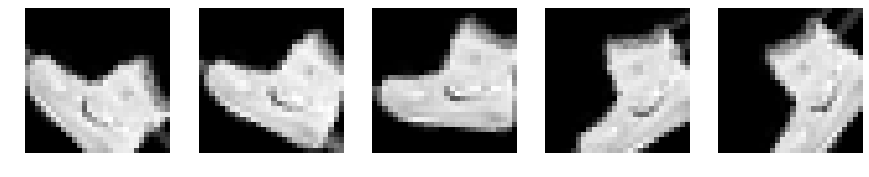

In [75]:
gen = datagen.flow(x_train[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

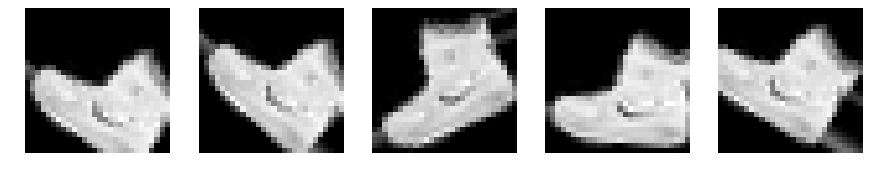

In [76]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [77]:
TRAIN= True

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
if TRAIN:
    model3.fit_generator(datagen.flow(x_train, y_train,
                        batch_size=BATCH_SIZE),
                        samples_per_epoch=x_train.shape[0],
                        nb_epoch=EPOCHS,
                        validation_data=(x_test, y_test), callbacks=callback_list)
    model3.save('gdrive/My Drive/AIML/Labs/CV/model/cnn_augment.h5')
else:
    print('Loading pretrained model...')
    model3 = keras.models.load_model('gdrive/My Drive/AIML/Labs/CV/model/cnn_augment.h5')
    print('Model Loaded.')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=30)`
  if __name__ == '__main__':


Epoch 1/30
1875/1875 [==============================] - 35s 18ms/step - loss: 0.9326 - acc: 0.6652 - val_loss: 0.3355 - val_acc: 0.8810
Epoch 2/30
1875/1875 [==============================] - 33s 18ms/step - loss: 0.6433 - acc: 0.7632 - val_loss: 0.3506 - val_acc: 0.8789
Epoch 3/30
1875/1875 [==============================] - 34s 18ms/step - loss: 0.5772 - acc: 0.7862 - val_loss: 0.3351 - val_acc: 0.8834
Epoch 4/30
1875/1875 [==============================] - 33s 18ms/step - loss: 0.5417 - acc: 0.8006 - val_loss: 0.3324 - val_acc: 0.8822
Epoch 5/30
1875/1875 [==============================] - 33s 18ms/step - loss: 0.5134 - acc: 0.8100 - val_loss: 0.3279 - val_acc: 0.8833
Epoch 6/30
1875/1875 [==============================] - 33s 18ms/step - loss: 0.4910 - acc: 0.8176 - val_loss: 0.3703 - val_acc: 0.8730
Epoch 7/30
1875/1875 [==============================] - 33s 18ms/step - loss: 0.4765 - acc: 0.8246 - val_loss: 0.3530 - val_acc: 0.8743
Epoch 8/30
1875/1875 [==========================

In [79]:
loss_and_metrics_train_4 = model3.evaluate(x_train, y_train)
print(loss_and_metrics_train_4)

60000/60000 [==============================] - 6s 108us/step
[0.28979801703294117, 0.89085]


In [80]:
loss_and_metrics_test_4 = model3.evaluate(x_test, y_test)
print(loss_and_metrics_test_4)

10000/10000 [==============================] - 1s 111us/step
[0.33712352937459944, 0.8745]


###  Report the final train and validation accuracy

In [82]:
print("Accuracy for Model 1 Basic CNN:")
print("Train Accuracy is: {}".format(loss_and_metrics_train_2))
print("Test Accuracy is: {}".format(loss_and_metrics2))

print("Accuracy for Model 2 CNN:")
print("Train Accuracy is: {}".format(loss_and_metrics_train_3))
print("Test Accuracy is: {}".format(loss_and_metrics_test_3))


("Accuracy for Model 3 Augmented CNN:")
print("Train Accuracy is: {}".format(loss_and_metrics_train_4))
print("Test Accuracy is: {}".format(loss_and_metrics_test_4))


Accuracy for Model 1 Basic CNN:
Train Accuracy is: [0.022531461145596406, 0.9923333333333333]
Test Accuracy is: [0.5625763349669054, 0.9059]
Accuracy for Model 2 CNN:
Train Accuracy is: [0.04609056234552215, 0.9851333333333333]
Test Accuracy is: [0.25161455241516234, 0.9271]
Train Accuracy is: [0.28979801703294117, 0.89085]
Test Accuracy is: [0.33712352937459944, 0.8745]
